In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

import tinycudann as tcnn

/home/sfk/miniconda3/envs/py38torch/lib/python3.8/site-packages/tqdm-4.64.1-py3.8.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
model = torch.load('../logs/sh/lego_rank10_sh28_init0.5highlr/model.pth')
model['model'].keys()
F = model['model']['features']
F.shape

torch.Size([28, 6, 6, 6, 6, 6])

In [44]:
direction_encoder = tcnn.Encoding(
            n_input_dims=3,
            encoding_config={
                "otype": "SphericalHarmonics",
                "degree": 3,
            },
        )
sh_mult = direction_encoder(torch.zeros(1,3).cuda()).cpu().detach().numpy()  # [1, 9]
print(sh_mult)





[[ 0.282   0.4885 -0.4885  0.4885  1.093  -1.093   0.631  -1.093   0.    ]]


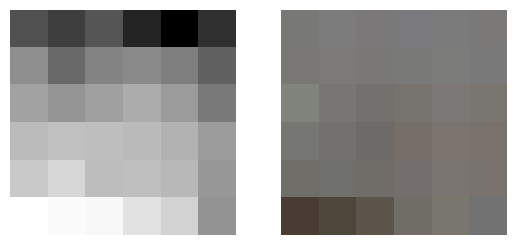

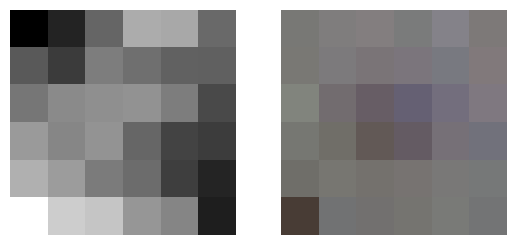

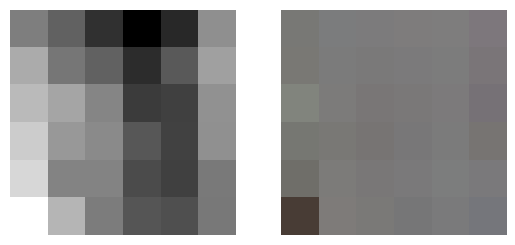

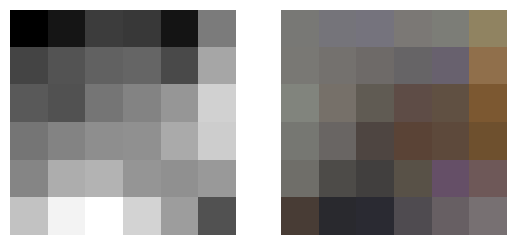

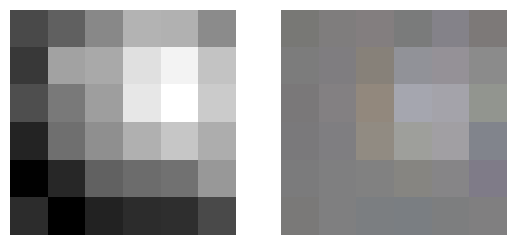

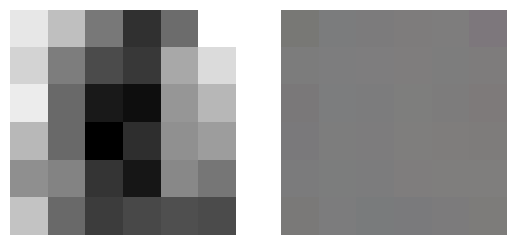

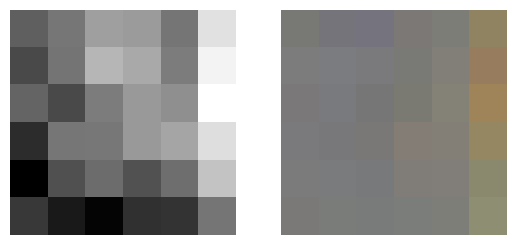

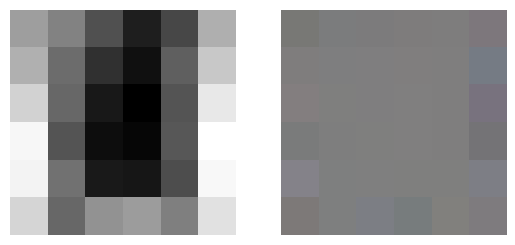

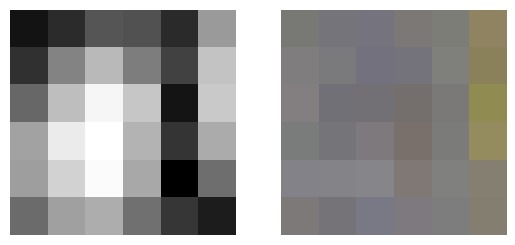

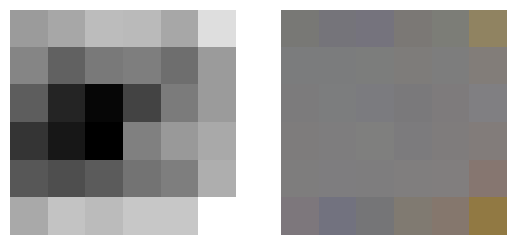

In [45]:
def visualize_slice(F, sh_mult, coords):
    # If coords are the ones we want to keep, construct the ones we want to not keep
    assert len(coords) == 2
    assert not (0 in coords)
    uncoords = [0,1,2,3,4,5]
    uncoords = [i for i in uncoords if not (i in coords)]
    # slice F according to the coordinates
    Fslice = F.cpu().numpy()
    Fslice = np.take(Fslice, 0, axis=uncoords[3])
    Fslice = np.take(Fslice, 0, axis=uncoords[2])
    Fslice = np.take(Fslice, 0, axis=uncoords[1])
    # visualize sigma (last entry) and the zero degree harmonics (reshape into 3 by 9, then take first set of 3 as rgb)
    sigma = Fslice[-1,:,:]
    rgb = Fslice[0:-1].reshape(3, -1, 6, 6)
    # rgb = np.sum(rgb * sh_mult[:,:,None,None], axis=1)
    rgb = rgb * sh_mult[:,:,None,None]
    rgb = rgb[:,0,:,:]
    rgb = torch.sigmoid(torch.from_numpy(rgb)).numpy()
    rgb = rgb.transpose(1,2,0)
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(sigma, cmap='gray')
    ax[0].set_axis_off()
    ax[1].imshow(rgb)
    ax[1].set_axis_off()
    plt.show()
    


visualize_slice(F, sh_mult, coords=[1,2])
visualize_slice(F, sh_mult, coords=[1,3])
visualize_slice(F, sh_mult, coords=[1,4])
visualize_slice(F, sh_mult, coords=[1,5])
visualize_slice(F, sh_mult, coords=[2,3])
visualize_slice(F, sh_mult, coords=[2,4])
visualize_slice(F, sh_mult, coords=[2,5])
visualize_slice(F, sh_mult, coords=[3,4])
visualize_slice(F, sh_mult, coords=[3,5])
visualize_slice(F, sh_mult, coords=[4,5])